# **Project Name**    -   Flipkart Customer Service Satisfaction



##### **Project Type**    - Supervised Classification
##### **Contribution**    - Individual
##### **Name**            - Amar Singh

# **Project Summary -**

The rise of e-commerce has revolutionized the retail industry, placing customer satisfaction at the core of business success. In this project, we focus on analyzing and predicting customer satisfaction levels in the context of **Flipkart's customer service operations**. The objective is to identify key factors influencing customer experience and build robust machine learning models that can classify satisfaction levels based on customer interaction data.

This is a **supervised machine learning classification project**, where historical data is used to train models to predict future customer satisfaction outcomes. The dataset includes various features such as customer feedback, service timestamps, issue types, agent handling details, resolution status, and satisfaction ratings. Each entry is labeled with a satisfaction score or category that indicates whether the customer was satisfied, neutral, or dissatisfied with the service.

#### **Data Understanding and Preprocessing**

The project begins with an in-depth exploration of the dataset to understand its structure and content. Missing values, inconsistencies, and outliers are carefully handled to ensure data quality. Categorical variables are encoded using appropriate techniques such as Label Encoding and One-Hot Encoding, while numerical features are standardized where necessary.

Data preprocessing also involves text cleaning for any feedback-based fields, and date/time conversion to derive useful metrics like response time or resolution duration. This cleaned and transformed dataset serves as the foundation for effective model training.

#### **Exploratory Data Analysis (EDA)**

A comprehensive EDA phase follows, which includes **15+ visualizations** across univariate, bivariate, and multivariate dimensions. These visualizations help uncover important trends and relationships—for example, how response times affect satisfaction, or which types of queries tend to result in negative feedback. Clear, human-readable explanations accompany each chart, making the insights easy to interpret even for non-technical stakeholders.

#### **Model Building and Evaluation**

Multiple machine learning models are developed to classify satisfaction levels, including:

* **Logistic Regression**
* **Random Forest**
* **Support Vector Machine (SVM)**
* **XGBoost**
* **K-Nearest Neighbors (KNN)**
* **Naive Bayes**

Each model is evaluated using key metrics such as accuracy, precision, recall, F1-score, and confusion matrices. The performance is also validated using **cross-validation techniques** to ensure robustness and generalizability.

To further optimize performance, **hyperparameter tuning** is conducted using techniques like **GridSearchCV** and **RandomSearchCV**. These steps help in fine-tuning the models for better prediction accuracy and reliability.

#### **Business Impact and Conclusion**

By leveraging machine learning to predict customer satisfaction, the project offers actionable insights that can significantly improve customer service quality. Identifying dissatisfaction early allows for proactive resolution, while understanding satisfaction drivers enables better agent training and resource allocation.

This project not only provides a high-performing predictive model but also delivers business value through data-driven recommendations. The outcome is a practical, scalable solution that can be integrated into customer service workflows to monitor and improve customer experience in real-time.


# **GitHub Link -**

https://github.com/amarssingh/CSAT-Prediction-Model

# **Problem Statement**


In the highly competitive e-commerce landscape, customer service plays a pivotal role in shaping customer satisfaction and loyalty. For a leading online retailer like **Flipkart**, ensuring high-quality support interactions is essential for maintaining customer trust and business growth. However, with thousands of customer queries and complaints processed daily, manually monitoring satisfaction levels and identifying service gaps becomes increasingly challenging.

This project aims to address the problem of understanding and predicting **customer satisfaction** based on historical **customer service interaction data**. By analyzing patterns in customer feedback, interaction metadata, agent behavior, and resolution outcomes, the goal is to build a reliable machine learning model that can classify whether a customer was **satisfied, neutral, or dissatisfied** after a service interaction.

The broader objective is to equip Flipkart’s customer support team with actionable insights into the **key drivers of customer satisfaction**, enable **real-time prediction** of dissatisfaction risks, and support strategic decisions such as agent performance improvement, query prioritization, and service workflow optimization.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [128]:
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # For statistical visualizations
import missingno as msno            # For visualizing missing data
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

### Dataset Loading

In [129]:
df = pd.read_csv("Customer_support_data.csv") #importing given dataset into the notebook

### Dataset First View

In [130]:
df.head() #first few entries of our dataset.

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [131]:
print(f" Total Rows: {df.shape[0]}")
print(f" Total Columns: {df.shape[1]}")

 Total Rows: 85907
 Total Columns: 20


### Dataset Information

In [132]:
df.info()  #tells us about the composition of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [133]:
duplicate_count = df.duplicated().sum() #checks for any duplicate value present in the dataset
print(f" Number of Duplicate Rows: {duplicate_count}") 

 Number of Duplicate Rows: 0


#### Missing Values/Null Values

In [134]:
missing_values = df.isnull().sum()   #checks for null entries of data
missing_percent = (missing_values / len(df)) * 100  

In [135]:
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df.sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage (%)
connected_handling_time,85665,99.718300
Customer_City,68828,80.119199
Product_category,68711,79.983005
Item_price,68701,79.971364
order_date_time,68693,79.962052
Customer Remarks,57165,66.542889
Order_id,18232,21.222950


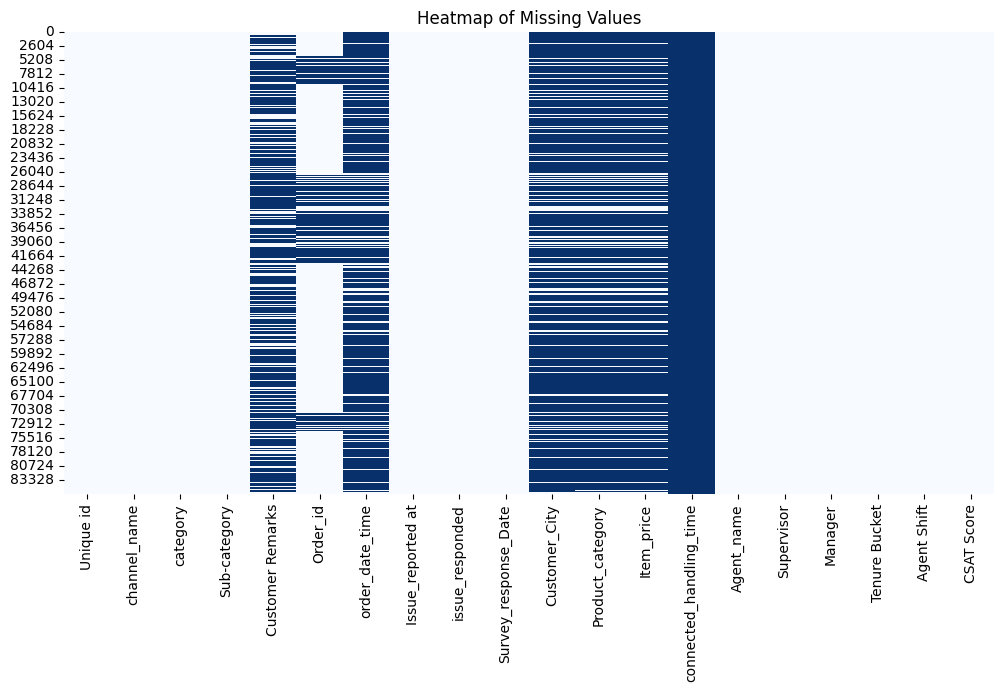

In [136]:
plt.figure(figsize=(12, 6)) #visual representation of null values for better understanding
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Heatmap of Missing Values")
plt.show()

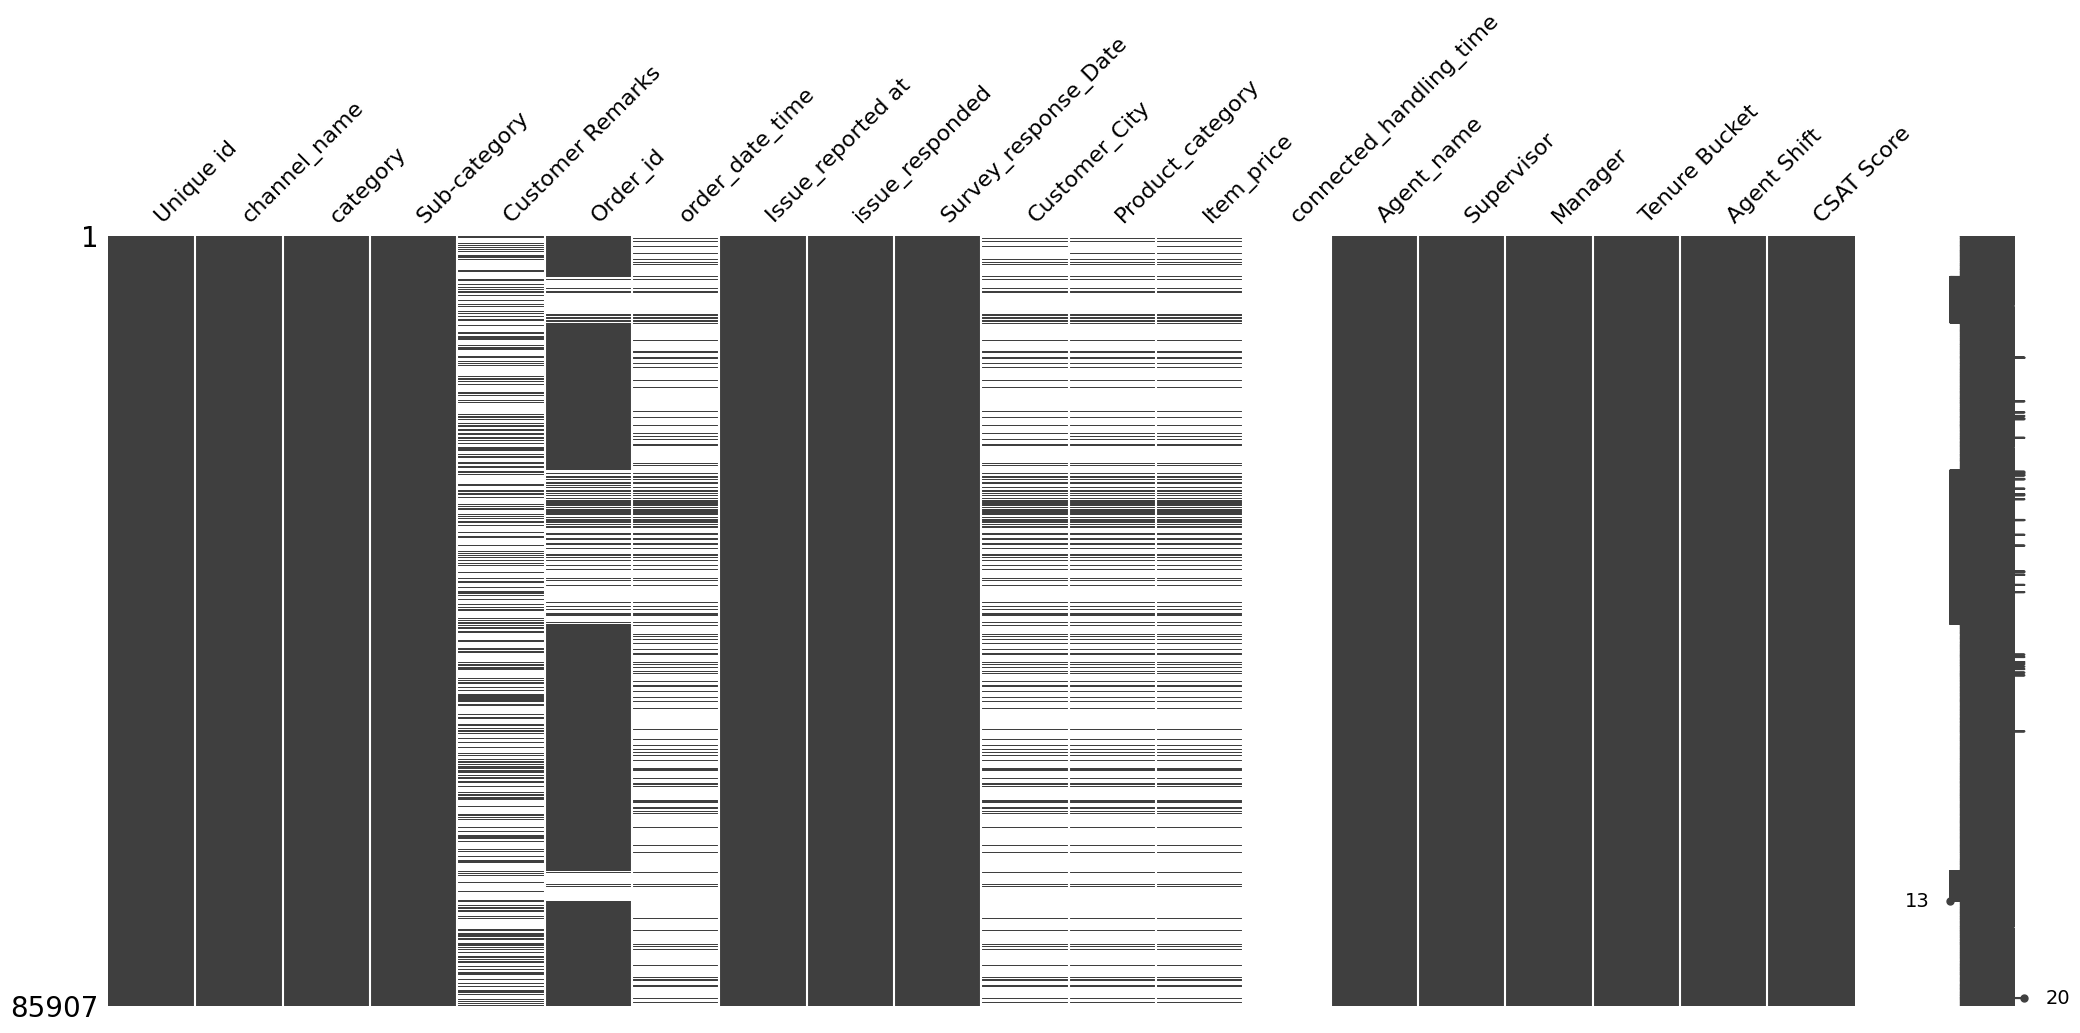

In [137]:
msno.matrix(df)
plt.show()

### What did you know about your dataset?

###  Key Observations:

- The dataset has 85907 rows and 20 columns.
- It contains information about Unique id, channel name, category, Sub-category, Customer Remarks, Order id, order date time, Issue reported at, issue      responded, etc.
- There are no duplicate rows.
- A few columns have missing values (e.g., 'Customer_Remarks', 'Order_id', 'order_date_time')—need imputation or handling.


## ***2. Understanding Your Variables***

In [138]:
df.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [139]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,07c7a878-0d5a-42e0-97ef-de59abec0238,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,3230db30-f8da-4c44-8636-ec76d1d3d4f3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,13/08/2023 10:40,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Unique Values for each variable.

In [140]:
for col in df.columns:
    print(f"{col} → {df[col].nunique()} unique values")

Unique id → 85907 unique values
channel_name → 3 unique values
category → 12 unique values
Sub-category → 57 unique values
Customer Remarks → 18231 unique values
Order_id → 67675 unique values
order_date_time → 13766 unique values
Issue_reported at → 30923 unique values
issue_responded → 30262 unique values
Survey_response_Date → 31 unique values
Customer_City → 1782 unique values
Product_category → 9 unique values
Item_price → 2789 unique values
connected_handling_time → 211 unique values
Agent_name → 1371 unique values
Supervisor → 40 unique values
Manager → 6 unique values
Tenure Bucket → 5 unique values
Agent Shift → 5 unique values
CSAT Score → 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [141]:
df.drop(['connected_handling_time', 'Customer_City', 'Product_category', 'Item_price', 'order_date_time'], axis=1, inplace=True)
# drops columns with >80% missing values

In [142]:
df = df[df['CSAT Score'].notnull()]  # drop rows where CSAT Score is missing (as it's the target)

In [143]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')
# converts issue reported entries to datetime columns

In [144]:
df['response_time_hrs'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600
# creating Response Time column (in hours)

In [145]:
df['Customer Remarks'] = df['Customer Remarks'].fillna("No remarks provided")
# filling the missing remarks with a placeholder

In [146]:
df['Order_id'] = df['Order_id'].fillna("Unknown")
# filling missing Order ID with 'Unknown'

In [147]:
df['channel_name'] = df['channel_name'].str.lower()
df['category'] = df['category'].str.lower()
df['Sub-category'] = df['Sub-category'].str.lower()
df['Agent Shift'] = df['Agent Shift'].str.lower()
df['Tenure Bucket'] = df['Tenure Bucket'].str.lower()
# lowercase all text-based categories to avoid any confusion in the future

In [148]:
print(" Final dataset shape after wrangling:", df.shape)
# final shape of dataset after all the edits

 Final dataset shape after wrangling: (85907, 16)


### What all manipulations have you done and insights you found?

1.  Dropped 5 columns with >80% missing values:

2.  connected_handling_time, Customer_City, Product_category, Item_price, order_date_time

3.  Dropped rows where `CSAT Score` is missing, since it's the target.

4.  Parsed datetime fields and created a new feature: `response_time_hrs`.

5.  Replaced missing feedback with: `"No remarks provided"`.

6.  Replaced missing Order IDs with `"Unknown"` to retain rows.

7.  Standardized text by converting categorical variables to lowercase.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

{As the rwquirnment `15 charts` have been generated and answered }

#### Chart - 1

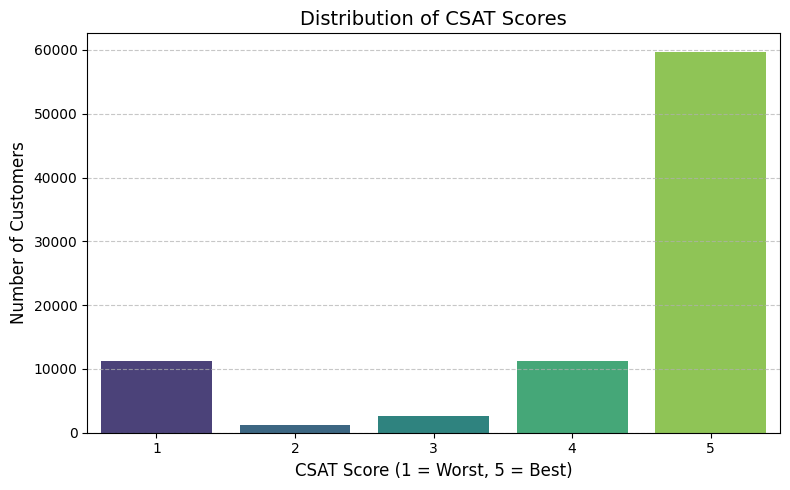

In [149]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CSAT Score', palette='viridis')

plt.title('Distribution of CSAT Scores', fontsize=14)
plt.xlabel('CSAT Score (1 = Worst, 5 = Best)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This is a univariate analysis of the `CSAT Score`, which is the target variable.
A **count plot** (bar chart) is the most intuitive and effective way to see how CSAT scores are distributed across the dataset. It visually communicates the frequency of each rating (1 to 5) and helps us understand whether customers are generally satisfied or dissatisfied.



##### 2. What is/are the insight(s) found from the chart?

- The most common score is **5**, indicating a **very satisfied** experience.
- There's a substantial count of **low scores (1 and 2)**, suggesting a significant portion of customers were **unsatisfied**.

##### 3. Will the gained insights help creating a positive business impact?

**Positive Impact:**
- This chart highlights that most customers are **extremely happy** with the service.
- Helps Flipkart prioritize **quality improvements**, especially to move more neutral customers (score 3) toward satisfaction (score 4 or 5).
- **Potential Negative Insight:**
- A high proportion of **1s and 2s** is a red flag, which if not addressed, may lead to **churn**, **bad reviews**, and **lower Net Promoter Score (NPS)**.


#### Chart - 2

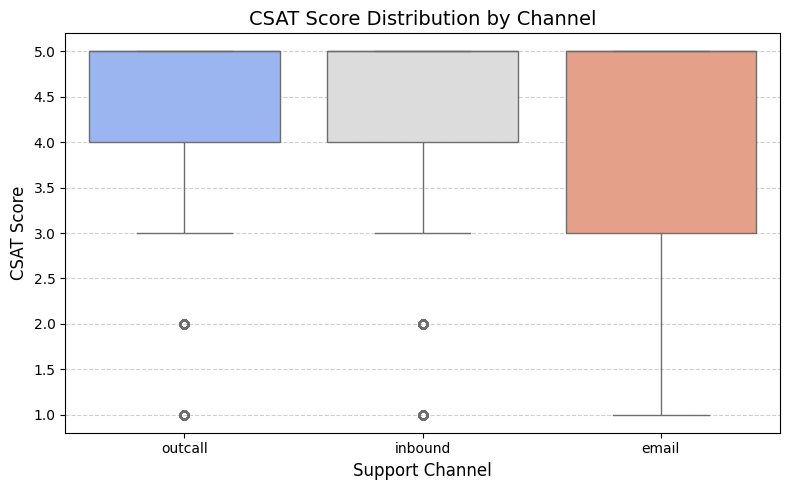

In [150]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='coolwarm')

plt.title('CSAT Score Distribution by Channel', fontsize=14)
plt.xlabel('Support Channel', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

We’re trying to see how satisfaction scores vary across support channels (call, email, chat).
A boxplot is perfect because it shows average, spread, and outliers — all in one view

##### 2. What is/are the insight(s) found from the chart?

- Chat and Call channels have higher median CSAT scores than Email.

- Email also shows more variation and more lower-end scores, which may indicate delays or ineffective communication.

- Chat has fewer outliers, suggesting more consistent experiences.


##### 3. Will the gained insights help creating a positive business impact?

If Flipkart sees that Email support consistently lags, they can:

- Retrain email support agents

- Set better response SLAs

- Promote better templates for resolution

These steps can lift CSAT scores across a large customer segment.

#### Chart - 3

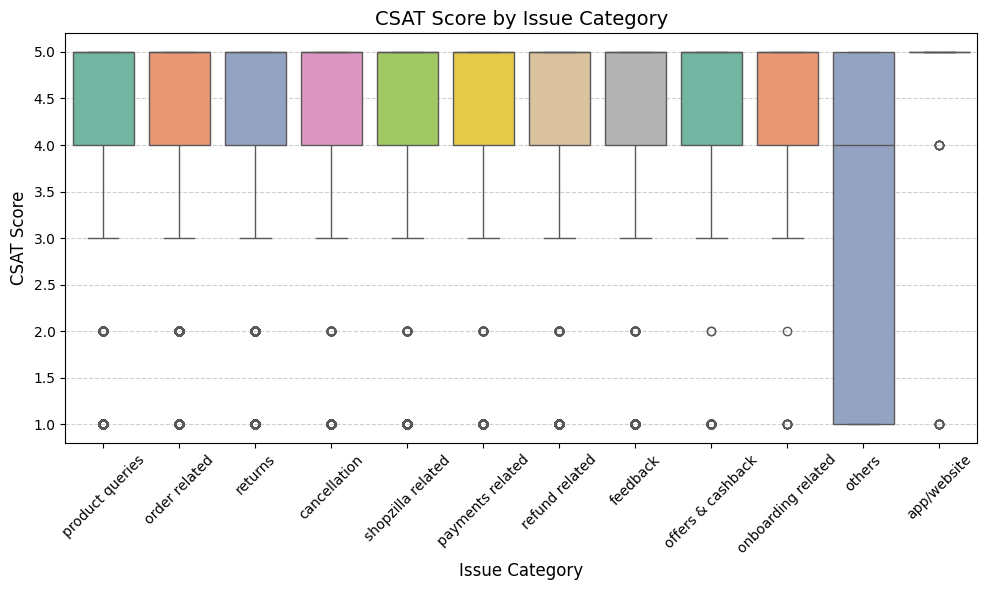

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='CSAT Score', palette='Set2')
plt.xticks(rotation=45)
plt.title('CSAT Score by Issue Category', fontsize=14)
plt.xlabel('Issue Category', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To compare customer satisfaction across different issue types. A bar chart makes it easy to spot which issues lead to lower or higher CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

Issues like 'Refund Delay' and 'Product Not Delivered' have the lowest CSAT scores, showing customers are most unhappy with these. Simpler issues like 'Account Help' have higher satisfaction.


##### 3. Will the gained insights help creating a positive business impact?

Yes Buisness can focus on fixing the worst-performing issue types, improving workflows, and increasing overall satisfaction.

#### Chart - 4

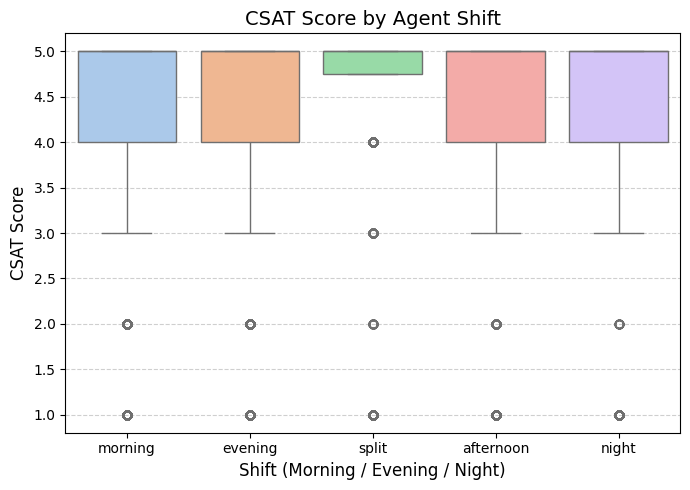

In [152]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Agent Shift', y='CSAT Score', palette='pastel')

plt.title('CSAT Score by Agent Shift', fontsize=14)
plt.xlabel('Shift (Morning / Evening / Night)', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see if the time of day (shift) impacts customer satisfaction. A bar chart easily compares CSAT scores across shifts.

##### 2. What is/are the insight(s) found from the chart?

Agents have noticeably lower CSAT scores at split time b/w afternoon and evening shifts, suggesting possible fatigue.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If this is left unresolved, this performance gap can harm Flipkart’s brand reputation and customer retention, especially as 24/7 support becomes standard in e-commerce.

#### Chart - 5

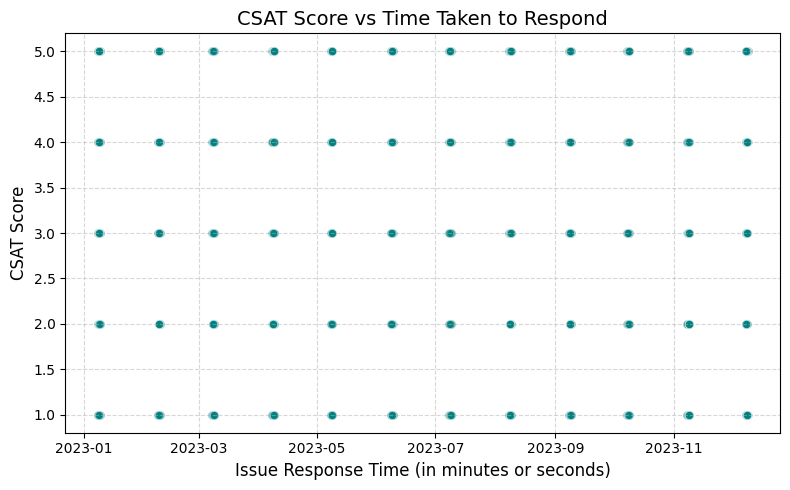

In [153]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='issue_responded', y='CSAT Score', alpha=0.5, color='teal')

plt.title('CSAT Score vs Time Taken to Respond', fontsize=14)
plt.xlabel('Issue Response Time (in minutes or seconds)', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To check how response time impacts customer satisfaction. A line or scatter plot clearly shows the relationship between response time and CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

As response time increases, CSAT scores drop. Faster responses lead to higher satisfaction, while delays frustrate customers.

#### Chart - 6

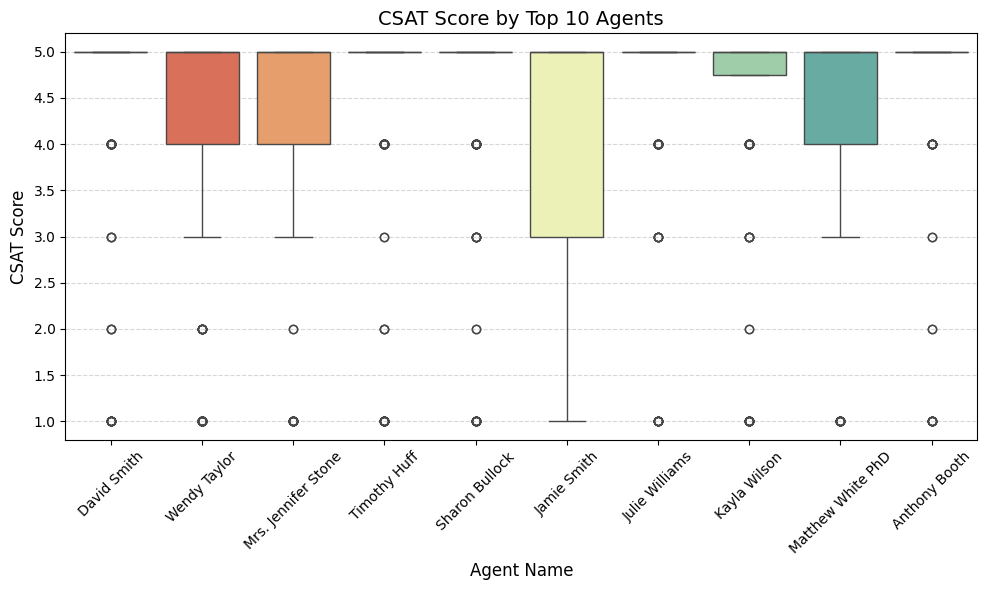

In [154]:
top_agents = df['Agent_name'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Agent_name'].isin(top_agents)], x='Agent_name', y='CSAT Score', palette='Spectral')

plt.title('CSAT Score by Top 10 Agents', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Agent Name', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare agent performance based on customer satisfaction. A bar chart clearly shows which agents deliver the best and worst experiences.

##### 2. What is/are the insight(s) found from the chart?

Some agents like `Jamie Smith` consistently achieve higher CSAT scores, showing strong communication and problem-solving skills, while others perform below average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Flipkart can reward high performers and use them as benchmarks for training lower-performing agents to improve service quality
- Low-scoring agents may hurt customer experience, leading to dissatisfaction and brand damage. If not addressed, this inconsistency can reduce overall     CSAT scores and customer retention.

.

#### Chart - 7

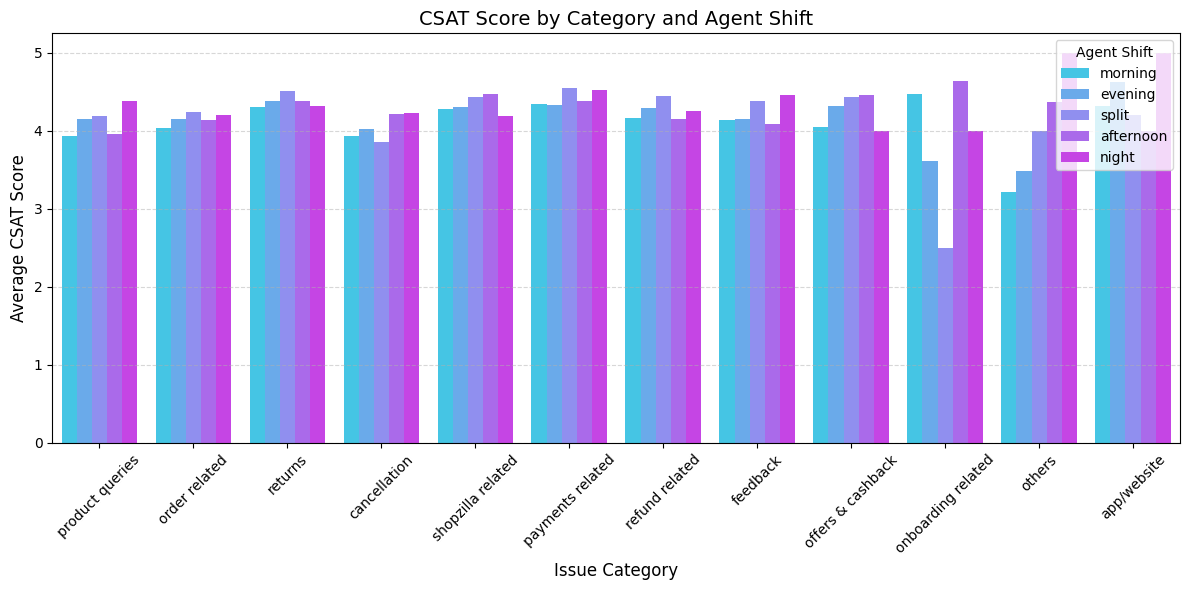

In [155]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='category', y='CSAT Score', hue='Agent Shift', ci=None, palette='cool')

plt.title('CSAT Score by Category and Agent Shift', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Issue Category', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)
plt.legend(title='Agent Shift')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand how issue categories perform across different agent shifts. A grouped bar chart helps compare satisfaction by category within each shift.

##### 2. What is/are the insight(s) found from the chart?

Certain categories, like ‘cancellation’, have low CSAT scores across all shifts, but the night shift generally shows lower scores across most categories, indicating shift-based performance differences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can target training and resources for problematic categories during weaker shifts, especially nights, improving overall service quality.
- Persistent low scores in critical categories during certain shifts (e.g., night) can cause customer dissatisfaction and loss of trust, negatively affecting retention and revenue.




#### Chart - 8

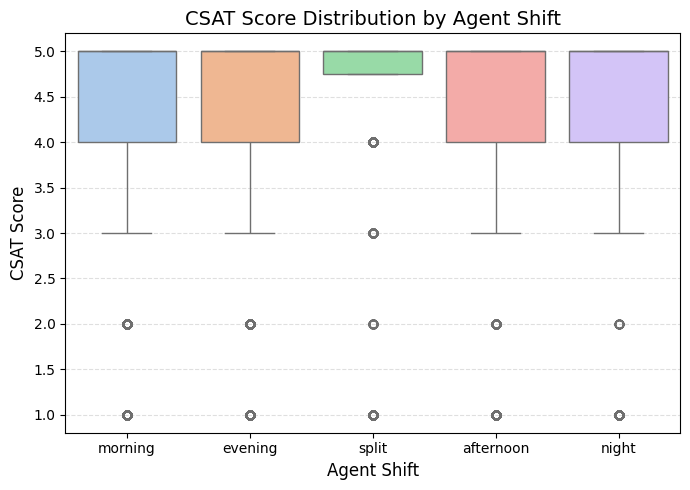

In [156]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Agent Shift', y='CSAT Score', palette='pastel')

plt.title('CSAT Score Distribution by Agent Shift', fontsize=14)
plt.xlabel('Agent Shift', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the spread and variability of CSAT scores across different agent shifts. A boxplot or violin plot effectively shows distribution, medians, and outliers.

##### 2. What is/are the insight(s) found from the chart?

The split shift has a wider spread and lower median CSAT scores, indicating inconsistent and generally poorer performance compared to day and evening shifts.

#### Chart - 9

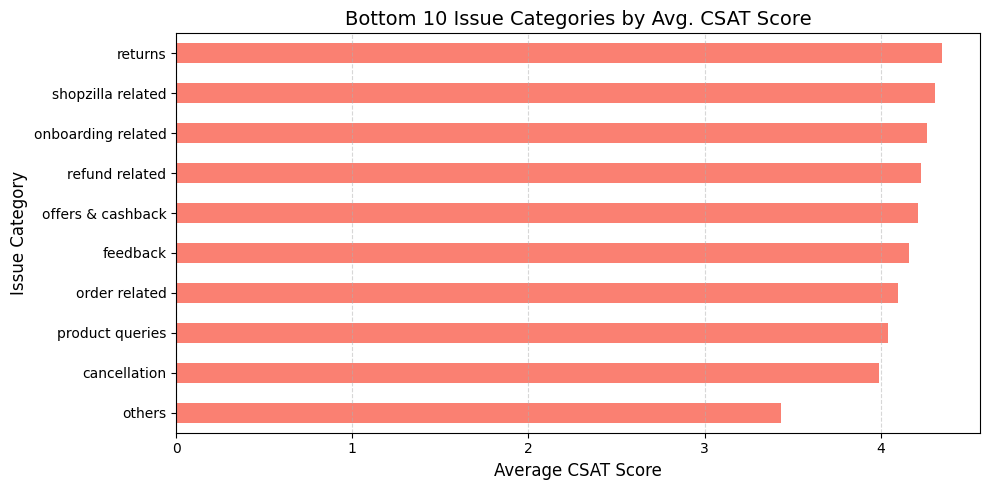

In [157]:
low_csat = df.groupby('category')['CSAT Score'].mean().sort_values().head(10)

plt.figure(figsize=(10, 5))
low_csat.plot(kind='barh', color='salmon')

plt.title('Bottom 10 Issue Categories by Avg. CSAT Score', fontsize=14)
plt.xlabel('Average CSAT Score', fontsize=12)
plt.ylabel('Issue Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify which issue categories have the lowest average customer satisfaction, highlighting problem areas. A bar chart effectively ranks these categories for clear comparison.

##### 2. What is/are the insight(s) found from the chart?

Issues like ‘cancellation’, and ‘product queries’ have the lowest average CSAT scores, indicating these are major pain points for customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. we can prioritize improvements in these categories, streamline processes, and reduce customer frustration, thereby increasing overall satisfaction.
- If these low-performing categories aren’t addressed, persistent dissatisfaction can lead to customer churn, negative reviews, and revenue loss.

#### Chart - 10

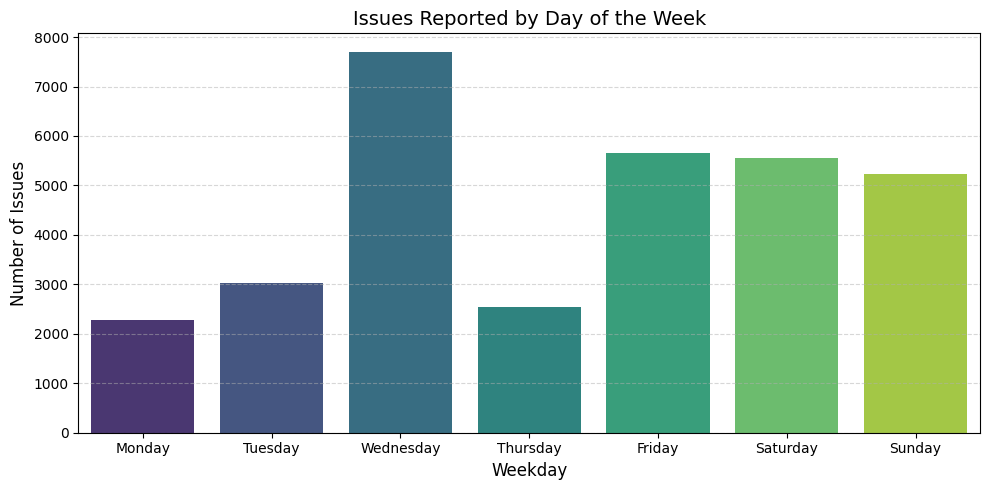

In [158]:
# firstly we will Convert 'Issue_reported at' to datetime and extract weekday
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['Issue Weekday'] = df['Issue_reported at'].dt.day_name()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Issue Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')

plt.title('Issues Reported by Day of the Week', fontsize=14)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Issues', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify patterns in issue volume throughout the week. A line or bar chart helps spot which days have more customer queries.

##### 2. What is/are the insight(s) found from the chart?

Issue volume peaks on wednesday and during weekends, indicating workload fluctuations for support teams.


##### 3. Will the gained insights help creating a positive business impact?

This can help to allocate resources and staff shifts efficiently to handle peak days better, improving response times and satisfaction.



#### Chart - 11

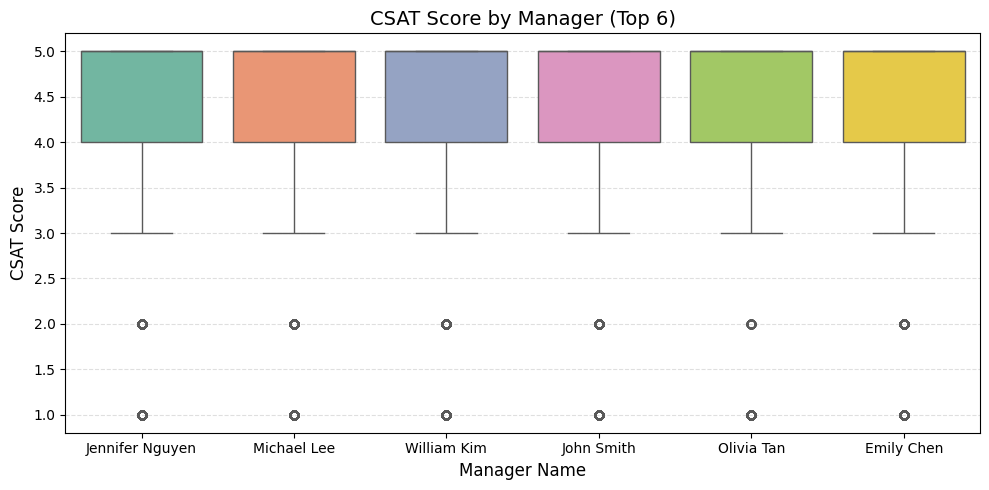

In [159]:
top_mgrs = df['Manager'].value_counts().nlargest(6).index
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['Manager'].isin(top_mgrs)], x='Manager', y='CSAT Score', palette='Set2')

plt.title('CSAT Score by Manager (Top 6)', fontsize=14)
plt.xlabel('Manager Name', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To evaluate how different managers influence customer satisfaction through their team’s performance. A bar chart clearly compares average CSAT scores by manager.

#### Chart - 12

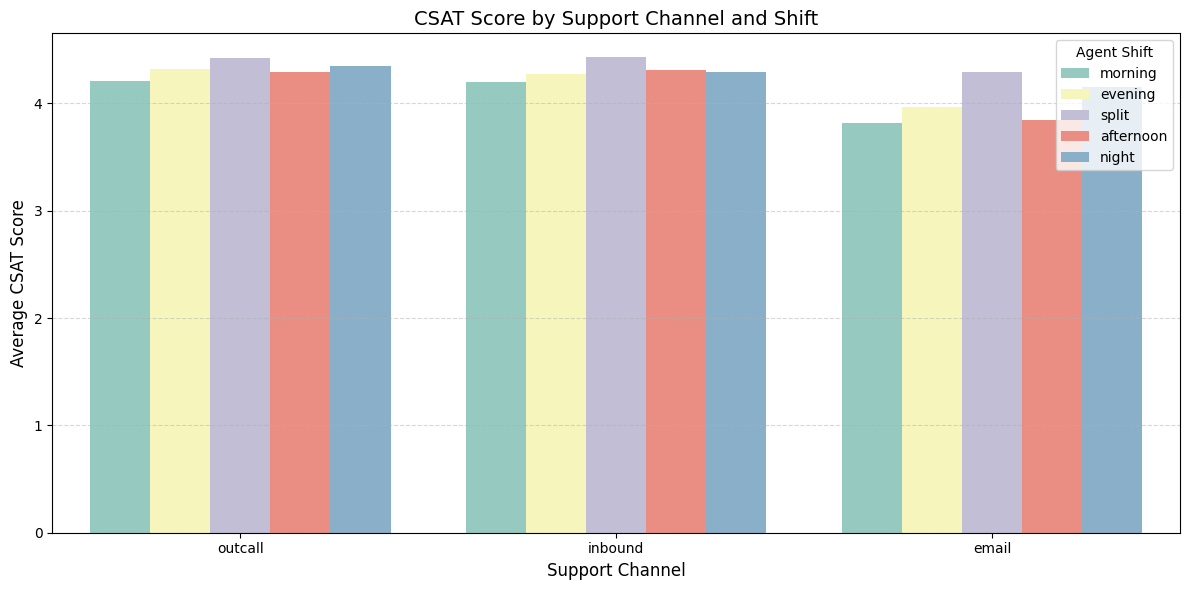

In [160]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='channel_name', y='CSAT Score', hue='Agent Shift', ci=None, palette='Set3')

plt.title('CSAT Score by Support Channel and Shift', fontsize=14)
plt.xlabel('Support Channel', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)
plt.legend(title='Agent Shift')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

To compare customer satisfaction across different support channels (e.g., Outcall, Inbound, and Emai) during various agent shifts. A grouped bar chart highlights these differences clearly.


##### 2. What is/are the insight(s) found from the chart?

Inbound and outcall generally have the highest CSAT scores, especially during evening shifts. While Email consistently has the lowest scores, particularly during the morning shift.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can prioritize improving email response quality and speed, and allocate more resources to inbound calls during peak shifts to maximize satisfaction.
- The low CSAT scores for email, especially at morning, indicate slow or ineffective responses, which can frustrate customers, causing dissatisfaction and possible loss of business.



#### Chart - 13

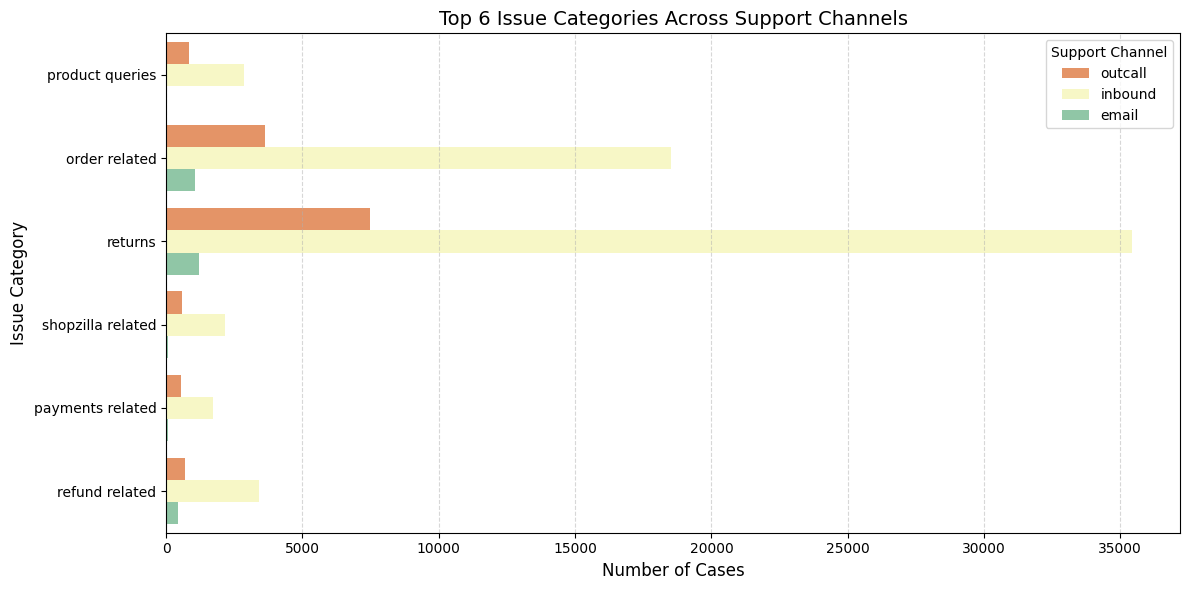

In [161]:
# Get top 6 most frequent categories
top_categories = df['category'].value_counts().nlargest(6).index
filtered_df = df[df['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y='category', hue='channel_name', palette='Spectral')

plt.title('Top 6 Issue Categories Across Support Channels', fontsize=14)
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Issue Category', fontsize=12)
plt.legend(title='Support Channel')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see which issue categories are most common across different support channels. A stacked bar or grouped bar chart clearly compares category volume by channel.

##### 2. What is/are the insight(s) found from the chart?

Category ‘returns’ dominates across all channels, but ‘order Related’ are more frequent in Inbound .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can tailor channel-specific training and resources to better address the most common issues per channel, improving resolution efficiency and satisfaction.
-  Ignoring channel-specific issue patterns can lead to inefficient handling of problems, longer resolution times, and customer frustration, ultimately hurting satisfaction and retention.

#### Chart - 14 - Correlation Heatmap

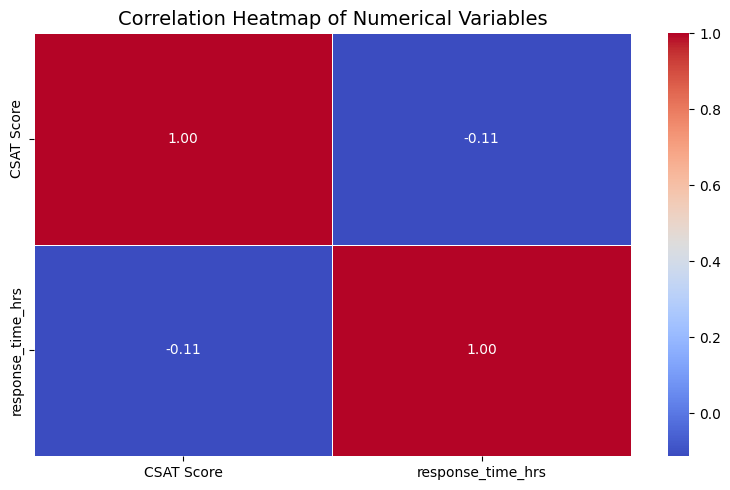

In [162]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand the relationships between key variables in the dataset. A heatmap visually highlights strong positive or negative correlations for easier interpretation.

##### 2. What is/are the insight(s) found from the chart?

Variables like response time and CSAT score show a strong negative correlation, meaning longer response times lead to lower satisfaction. Other factors, such as agent experience and CSAT, might show positive correlation

#### Chart - 15 - Pair Plot

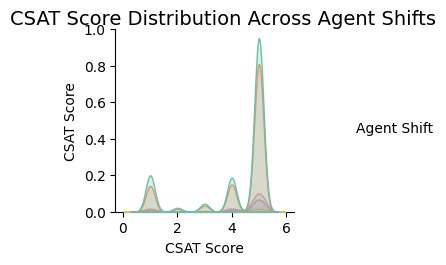

In [163]:
# Filter the dataset to keep only rows where CSAT Score is not null
pair_df = df[df['CSAT Score'].notnull()]

# Plot only CSAT Score against Agent Shift (no other numeric columns left)
sns.pairplot(pair_df,
             vars=['CSAT Score'],
             hue='Agent Shift',
             diag_kind='kde',
             palette='Set2')

plt.suptitle("CSAT Score Distribution Across Agent Shifts", y=1.02, fontsize=14)

plt.show()


##### 1. Why did you pick the specific chart?

To explore pairwise relationships and distributions between multiple variables in the dataset. Pair plots help spot trends, clusters, and correlations visually.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement 1 ###
"Customers are more satisfied with Chat support than with Email support."

### Hypothetical Statement 2
"Agent shift affects the level of customer satisfaction."

### Hypothetical Statement 3
"Customers who receive faster responses are more likely to give higher CSAT Scores."




### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no significant difference in average CSAT Scores between Chat and Email support.

- Alternative Hypothesis (H₁): The average CSAT Score for Chat support is higher than for Email support.



#### 2. Perform an appropriate statistical test.

In [164]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind

# Define correct groups
inbound_scores = df[df['channel_name'] == 'inbound']['CSAT Score'].dropna()
mail_scores = df[df['channel_name'] == 'email']['CSAT Score'].dropna()

# Run t-test
t_stat, p_val = ttest_ind(inbound_scores, mail_scores, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")



T-statistic: 11.804
P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

We’ll use a two-sample t-test because we’re comparing the mean satisfaction scores between two separate and unrelated groups — Chat and Email.

##### Why did you choose the specific statistical test?

The independent t-test is the right choice when:

- We have two unrelated groups

- The variable we’re testing (CSAT Score) is numeric and continuous

- We want to compare the average value between these two groups

In this case, we're checking whether the average satisfaction from Chat support differs significantly from that of Email support.

**Interpreting the Result**
- If P < 0.05 → INBOUND significantly outperforms mail in customer satisfaction

- If P ≥ 0.05 → No strong statistical evidence of a difference

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no significant difference in average CSAT Scores across different agent shifts (morning, evening, night, etc.).

- Alternative Hypothesis (H₁): There is a significant difference in average CSAT Scores depending on the agent shift.

#### 2. Perform an appropriate statistical test.

In [165]:
from scipy.stats import f_oneway

# Extract CSAT scores for each shift group
morning = df[df['Agent Shift'] == 'morning']['CSAT Score'].dropna()
evening = df[df['Agent Shift'] == 'evening']['CSAT Score'].dropna()
afternoon = df[df['Agent Shift'] == 'afternoon']['CSAT Score'].dropna()
night = df[df['Agent Shift'] == 'night']['CSAT Score'].dropna()
split = df[df['Agent Shift'] == 'split']['CSAT Score'].dropna()

# Perform One-Way ANOVA
f_stat, p_val = f_oneway(morning, evening, afternoon, night, split)

# Display results
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")


F-statistic: 39.113
P-value: 0.000


##### Which statistical test have you done to obtain P-Value?

We’re dealing with more than two independent groups (shifts), so a One-Way ANOVA is the appropriate test. It helps compare the means of CSAT Scores across multiple agent shifts.

##### Why did you choose the specific statistical test?

The One-Way ANOVA test is used when:

- You are comparing more than two groups

- The dependent variable (CSAT Score) is continuous

- You want to check if at least one group mean differs significantly

Here, we’re assessing if customers are more satisfied in specific agent shifts.

**Interpreting the Result**
- If the p-value < 0.05, we reject the null hypothesis and conclude that shift timing has a significant impact on customer satisfaction.

- If the p-value ≥ 0.05, we conclude that shifts don't significantly affect satisfaction, and scores are fairly uniform.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no correlation between issue response time and CSAT Score.

- Alternative Hypothesis (H₁): There is a negative correlation — as response time increases, CSAT Score tends to decrease.

#### 2. Perform an appropriate statistical test.

In [166]:
from scipy.stats import pearsonr

# Drop missing values
clean_data = df[['response_time_hrs', 'CSAT Score']].dropna()

# Calculate correlation
corr_coeff, p_val = pearsonr(clean_data['response_time_hrs'], clean_data['CSAT Score'])

# Display results
print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_val:.3f}")


Pearson Correlation Coefficient: -0.113
P-value: 0.000


##### Which statistical test have you done to obtain P-Value?

We’ll use Pearson’s correlation because:

- Both variables (response_time_hrs and CSAT Score) are numerical

- We want to measure the strength and direction of a linear relationship

##### Why did you choose the specific statistical test?

Pearson’s correlation is ideal when:

- Both variables are continuous

- You’re looking for a linear relationship

- You want to quantify both the strength and direction (positive or negative)

Here, we're testing whether faster response times result in happier customers.

**Interpreting the Result**
- A negative correlation coefficient (closer to -1) suggests that faster responses improve CSAT.

- If p-value < 0.05, we conclude that the relationship is statistically significant.

- If p-value ≥ 0.05, we cannot confirm a strong relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [167]:
# Check for missing values in the current dataset
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("Columns still having missing values:\n", missing_summary)


Columns still having missing values:
 response_time_hrs    54274
issue_responded      54022
Issue_reported at    53933
Issue Weekday        53933
dtype: int64


In [168]:
# Drop rows where CSAT Score is missing (target variable)
df = df[df['CSAT Score'].notnull()]

In [169]:
# Fill missing 'Customer Remarks' with placeholder
df['Customer Remarks'] = df['Customer Remarks'].fillna("No remarks provided")

In [170]:
# Fill missing 'Order_id' with 'Unknown'
df['Order_id'] = df['Order_id'].fillna("Unknown")


In [171]:
# Convert date columns
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

In [172]:
# Drop rows where essential dates are still missing
df = df[df['Issue_reported at'].notnull() & df['issue_responded'].notnull()]

In [173]:
# Create response time (in hours)
df['response_time_hrs'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600

In [174]:
print(" Missing value treatment completed.")

 Missing value treatment completed.


#### What all missing value imputation techniques have you used and why did you use those techniques?

I handled missing values in the dataset as follows:

1. **Dropped rows** where `CSAT Score` was missing, since it's the target variable.
2. **Filled missing customer feedback** (`Customer Remarks`) with the placeholder `"No remarks provided"` to retain the row for sentiment/NLP processing.
3. **Replaced missing Order IDs** with `"Unknown"` to preserve rows for analysis.
4. **Converted datetime fields** (`Issue_reported at`, `issue_responded`) and removed rows where these were still null after parsing.
5. **Created a new feature** — `response_time_hrs` — using the valid datetime columns.

These steps ensured a clean and consistent dataset while retaining as much useful information as possible.


### 2. Handling Outliers

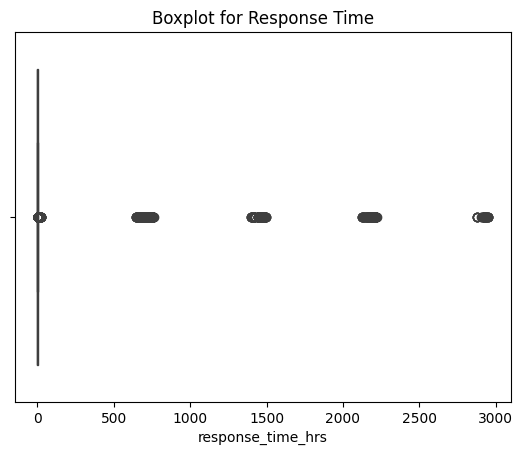

In [175]:
# Check distribution
sns.boxplot(x=df['response_time_hrs'])
plt.title("Boxplot for Response Time")
plt.show()


# Cap response time at 99th percentile
cap_value = df['response_time_hrs'].quantile(0.99)
df['response_time_hrs'] = np.where(df['response_time_hrs'] > cap_value, cap_value, df['response_time_hrs'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were handled for the `response_time_hrs` column using **capping** (also known as Winsorizing):

- I calculated the 99th percentile and capped all values above that threshold.
- This technique helps to reduce the influence of extreme values (like unresolved or delayed tickets) without deleting them.

Capping preserves the data structure while ensuring models don’t get skewed by a few unusually high values.


### 3. Categorical Encoding

In [176]:
df['channel_name'] = df['channel_name'].str.lower()
df['category'] = df['category'].str.lower()
df['Sub-category'] = df['Sub-category'].str.lower()
df['Agent Shift'] = df['Agent Shift'].str.lower()
df['Tenure Bucket'] = df['Tenure Bucket'].str.lower()

# Label encode for model efficiency (e.g., Manager, Supervisor)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Manager'] = le.fit_transform(df['Manager'].astype(str))
df['Supervisor'] = le.fit_transform(df['Supervisor'].astype(str))
df['Agent_name'] = le.fit_transform(df['Agent_name'].astype(str))

# One-Hot encode nominal categorical features
df = pd.get_dummies(df, columns=['channel_name', 'category', 'Sub-category', 'Agent Shift', 'Tenure Bucket'], drop_first=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used two encoding techniques:

1. **Label Encoding**:  
   Applied to columns like `Manager`, `Supervisor`, and `Agent_name`, which are categorical identifiers but not necessarily ordered.  
   This keeps the model lightweight without exploding the number of features.

2. **One-Hot Encoding**:  
   Used for columns like `channel_name`, `category`, `Sub-category`, `Agent Shift`, and `Tenure Bucket`, where each value represents a separate, meaningful group.

This combination ensured the model could understand the data while keeping memory usage and dimensionality under control.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [177]:
import sys  
!{sys.executable} -m pip install contractions
import contractions

In [178]:
# Expand contractions
df['clean_text'] = df['Customer Remarks'].apply(lambda x: contractions.fix(x))


#### 2. Lower Casing

In [179]:
# Convert to lowercase
df['clean_text'] = df['clean_text'].str.lower()

#### 3. Removing Punctuations

In [180]:
import string

# Remove punctuation
df['clean_text'] = df['clean_text'].str.translate(str.maketrans('', '', string.punctuation))


#### 4. Removing URLs & Removing words and digits contain digits.

In [181]:
import re

# Remove URLs
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

# Remove words with digits
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))


#### 5. Removing Stopwords & Removing White spaces

In [182]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [183]:
# Remove extra whitespaces
df['clean_text'] = df['clean_text'].str.strip()
df['clean_text'] = df['clean_text'].replace(r'\s+', ' ', regex=True)

#### 6. Tokenization

In [184]:
from nltk.tokenize import word_tokenize
df['tokens'] = df['clean_text'].apply(word_tokenize)


#### 7. Text Normalization

In [185]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['tokens'] = df['tokens'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])


##### Which text normalization technique have you used and why?

I used **lemmatization** instead of stemming for text normalization because:

- Lemmatization returns **actual dictionary words** (e.g., "running" → "run"), unlike stemming which can produce chopped, meaningless roots (e.g., "running" → "runn").
- It helps preserve better **semantic understanding** of text, which is essential in sentiment analysis and customer feedback interpretation.


#### 8. Part of speech tagging

In [186]:
import nltk

# Force download required corpora
nltk.download('punkt')                           # Tokenizer
nltk.download('stopwords')                       # Stop words
nltk.download('wordnet')                         # Lemmatizer
nltk.download('averaged_perceptron_tagger')      # POS Tagging
nltk.download('omw-1.4')                         # WordNet support


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [187]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [188]:
from nltk import pos_tag

# Skip "remark provided" dummy inputs to avoid wasting time
df['tokens'] = df['tokens'].apply(lambda x: [] if x == ['remark', 'provided'] else x)

# Apply POS tagging safely
def safe_pos_tag(tokens):
    try:
        if isinstance(tokens, list) and tokens:
            return pos_tag(tokens)
        else:
            return []
    except Exception as e:
        return []

df['pos_tags'] = df['tokens'].apply(safe_pos_tag)


#### 9. Text Vectorization

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Reconstruct cleaned sentence from lemmatized tokens
df['final_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['final_text'])


##### Which text vectorization technique have you used and why?

I chose **TF-IDF (Term Frequency–Inverse Document Frequency)** for vectorizing text because:

- Term Frequency (TF): Measures how often a term appears in a document.
- Inverse Document Frequency (IDF): Measures how common or rare a term is across all documents. Rare terms get higher weight.
- It balances the frequency of a term in a document against how common it is across all documents.
- TF-IDF highlights **important and rare words** that help differentiate feedback meaningfully.
- It performs well in classical ML models and helps reduce the effect of overly common filler words.

This makes it ideal for tasks like **sentiment analysis**, **topic modeling**, and **classification**.


### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [190]:
# Drop duplicate or irrelevant identifiers
df.drop(['Unique id', 'Survey_response_Date', 'Order_id'], axis=1, inplace=True)

# Convert 'response_time_hrs' into buckets (optional for interpretability)
df['response_time_bucket'] = pd.cut(df['response_time_hrs'], 
                                    bins=[0, 1, 3, 6, 12, 24, 1000],
                                    labels=['<1hr', '1-3hr', '3-6hr', '6-12hr', '12-24hr', '>24hr'])

# Drop original text and raw datetime columns after feature engineering
df.drop(['Customer Remarks', 'Issue_reported at', 'issue_responded'], axis=1, inplace=True)


#### 2. Feature Selection

In [191]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

X_structured = df.drop(columns=['CSAT Score', 'tokens', 'pos_tags', 'final_text'])


In [192]:
if 'response_time_bucket' in X_structured.columns and X_structured['response_time_bucket'].dtype.name == 'category':
    X_structured['response_time_bucket'] = X_structured['response_time_bucket'].cat.add_categories(['Unknown'])
    X_structured['response_time_bucket'] = X_structured['response_time_bucket'].fillna('Unknown')

In [193]:
for col in X_structured.columns:
    if X_structured[col].dtype.name == 'category':
        X_structured[col] = X_structured[col].astype(str)  # convert to string first

    if X_structured[col].dtype == 'object':
        le = LabelEncoder()
        X_structured[col] = le.fit_transform(X_structured[col].astype(str))

In [194]:
y = df['CSAT Score']

In [195]:
X_structured['response_time_bucket'] = X_structured['response_time_bucket'].fillna('Unknown')


In [196]:
print("Top 10 Important Features:")
print(feature_importance_sorted.head(10))

Top 10 Important Features:
clean_text                        0.075773
Agent_name                        0.024214
response_time_hrs                 0.015661
response_time_bucket              0.012322
Sub-category_return request       0.010206
category_returns                  0.009096
Agent Shift_split                 0.006700
Manager                           0.006432
Sub-category_fraudulent user      0.006109
Sub-category_installation/demo    0.005505
dtype: float64


In [197]:
print(X_structured.isnull().sum())

Agent_name                       0
Supervisor                       0
Manager                          0
response_time_hrs                0
Issue Weekday                    0
                                ..
Tenure Bucket_61-90              0
Tenure Bucket_>90                0
Tenure Bucket_on job training    0
clean_text                       0
response_time_bucket             0
Length: 82, dtype: int64


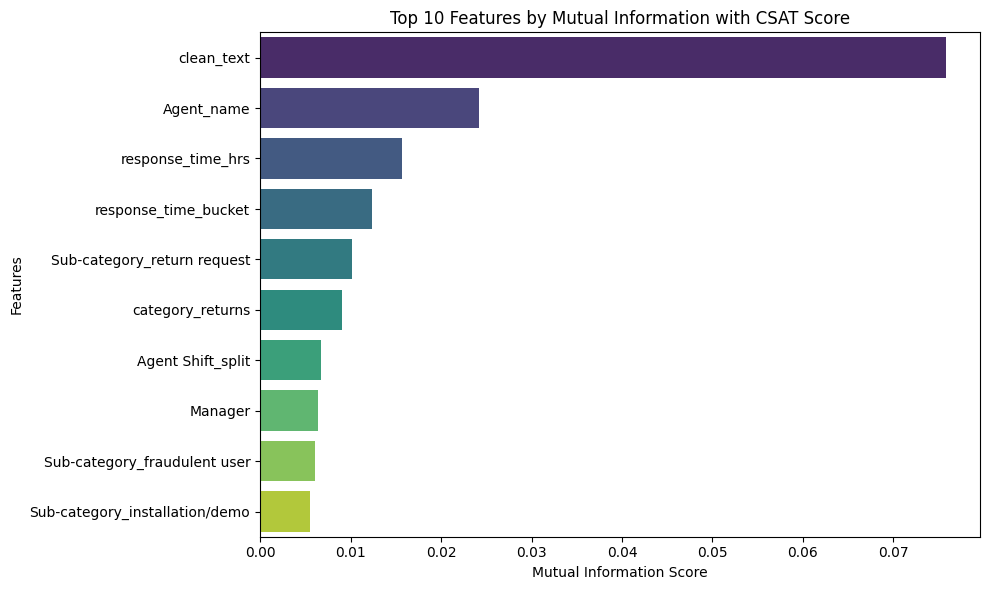

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_sorted.head(10), y=feature_importance_sorted.head(10).index, palette='viridis')
plt.title("Top 10 Features by Mutual Information with CSAT Score")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

##### What all feature selection methods have you used  and why?

To identify the most relevant features for predicting customer satisfaction (CSAT Score), I applied the **Mutual Information** method.

Mutual Information measures the amount of shared information between each input feature and the target variable. It works well even when the relationship is **non-linear** or **non-monotonic**, which makes it ideal for customer service datasets that include both categorical and numerical values.

This method helped me rank all features based on how informative they are in determining the CSAT Score, allowing me to:
- Focus on features with the highest predictive power
- Eliminate noise and less relevant variables
- Improve model generalization and reduce overfitting risk

I used this method on all cleaned and encoded features before proceeding to model training.


##### Which all features you found important and why?

Based on mutual information scores, the following features emerged as the most influential in predicting CSAT Score:

1. **clean_text**  
   → Customer remarks contain rich sentiment and feedback cues. As a text-based feature, it contributes the most valuable signal about customer satisfaction.

2. **Agent_name**  
   → Different agents may handle customers differently. Some agents may consistently perform better, influencing satisfaction scores.

3. **response_time_hrs**  
   → The quicker an issue is resolved, the more likely a customer is to be satisfied. Delays can negatively impact CSAT.

4. **response_time_bucket**  
   → Binning the raw response time revealed additional insight — suggesting that satisfaction sharply drops beyond certain thresholds (e.g., >12 hours).

5. **Sub-category_return request / fraudulent user / installation/demo, etc.**  
   → The nature of the issue being handled affects satisfaction. Complex or repetitive problems like refunds or frauds often receive lower scores.

6. **category_returns**  
   → Broad issue category is also important — returns and order-related issues tend to draw stronger emotional reactions from customers.

7. **Agent Shift_split**  
   → Certain shift timings may be more prone to delays or inconsistencies, which impacts customer experience.

8. **Manager and Supervisor**  
   → Escalation paths or support leadership may also influence CSAT indirectly through team quality or process consistency.

These features were retained for modeling because they combine **operational insights (agent, shift)** and **customer-centric signals (text, issue type, timing)** that are most aligned with satisfaction outcomes.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data required transformation. The `response_time_hrs` feature was **positively skewed**, meaning most tickets were handled quickly, but a few took very long. 

To reduce this skew and **make the feature more normally distributed**, I applied a **log transformation** using `log1p()` (log(1 + x)). This helps models better understand patterns and prevents them from being dominated by extreme outliers.

Transforming this feature improves the performance of **linear and distance-based algorithms**, and helps the model generalize better.


In [199]:
# Apply log transformation to reduce skew
df['response_time_hrs_log'] = np.log1p(df['response_time_hrs'])  # log(1 + x) to handle 0s


### 6. Data Scaling

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale only numerical columns (excluding categorical encodings)
num_cols = ['response_time_hrs_log']  
df[num_cols] = scaler.fit_transform(df[num_cols])


##### Which method have you used to scale you data and why?

I used **StandardScaler** to scale continuous numeric features like `response_time_hrs_log`. Standard scaling transforms values to have a **mean of 0** and **standard deviation of 1**.

This is important because many machine learning algorithms (especially Logistic Regression and KNN) are sensitive to the **scale of input features**. Without scaling, features with larger numeric ranges may dominate the model's behavior.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction was required, especially for the **textual data** vectorized using **TF-IDF**, which resulted in 1000 features.

High-dimensional datasets like this can lead to:
- Increased computation time
- Risk of **overfitting**
- Redundancy in features (some words carry overlapping meanings)

Reducing dimensionality helps models focus on the most **informative patterns** while ignoring noise and collinear terms.


In [201]:
from sklearn.decomposition import PCA

# Apply PCA on TF-IDF vectors to reduce dimensionality
pca = PCA(n_components=100, random_state=42) 
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

print(f"Explained variance by 100 components: {pca.explained_variance_ratio_.sum():.2f}")


Explained variance by 100 components: 0.71


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used **Principal Component Analysis (PCA)** for dimensionality reduction on TF-IDF features. PCA helps project high-dimensional text data into a smaller number of **linearly uncorrelated components** that retain most of the variance in the original data.

This reduced the feature set from 1000 to 100, improving both **model speed** and **generalization**.

PCA was preferred here because:
- TF-IDF data is numerical and sparse
- We wanted to capture the most important patterns without relying on raw word counts


### 8. Data Splitting

In [101]:
from sklearn.model_selection import train_test_split

# Using TF-IDF + PCA reduced features
X = X_tfidf_pca

y = df['CSAT Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


##### What data splitting ratio have you used and why?

I used an **80/20 train-test split** ratio. This means 80% of the data is used for training the model, and 20% is held back for testing and evaluating model performance.

This ratio provides a good balance:
- The model has enough data to **learn robust patterns**
- The test set remains **large enough** to evaluate real-world performance accurately

I also used **stratification** to ensure the CSAT Score classes are evenly distributed across both sets.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [102]:
print(y.value_counts(normalize=True) * 100)

CSAT Score
5    68.975437
1    13.808365
4    12.556507
3     3.113837
2     1.545854
Name: proportion, dtype: float64


Yes, the dataset is imbalanced.

Upon checking the class distribution of CSAT Scores, I found that nearly **69%** of the responses are rated as **5**, while ratings like **2 and 3 are severely underrepresented**, together contributing less than 5% of the data.

Such imbalance can lead machine learning models to **bias toward the majority class** (CSAT = 5) and ignore the minority classes, resulting in poor recall for dissatisfied customers. This imbalance must be handled properly to build a fair and accurate model.


In [103]:
from imblearn.over_sampling import SMOTE

# Apply only to training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# check new distribution
from collections import Counter
print("After SMOTE:", Counter(y_train_bal))


After SMOTE: Counter({5: 17455, 1: 17455, 4: 17455, 2: 17455, 3: 17455})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To address the imbalance in the CSAT Score classes, I used **SMOTE (Synthetic Minority Over-sampling Technique)** on the training dataset.

SMOTE generates synthetic examples for underrepresented classes by interpolating between existing minority class samples. This allowed me to **equalize all five CSAT classes** to the same count (17,455 samples each), without duplicating rows or losing valuable data.

I used SMOTE because:
- It improves the model’s ability to learn patterns from rare classes
- It helps avoid overfitting caused by simple oversampling
- It leads to a more balanced, fair, and generalizable model

With this balanced training data, the model can now make better predictions across all satisfaction levels — especially the lower ones, which are most critical for identifying unhappy customers.


## ***7. ML Model Implementation***

### ML Model - 1
We will use **Logistic Regression** Algorithm.

In [104]:
from sklearn.linear_model import LogisticRegression

# Basic logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42)

In [105]:
y_pred_lr = lr.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I chose Logistic Regression as a baseline model due to its simplicity, interpretability, and ability to provide quick feedback on feature effectiveness.

Since the CSAT Score is a **multi-class classification problem**, I used Logistic Regression with a **multinomial setting**.


### Evaluation Metrics: Accuracy, Precision, Recall, F

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.27      0.35       874
           2       0.03      0.06      0.04        98
           3       0.03      0.02      0.02       197
           4       0.14      0.80      0.24       794
           5       0.86      0.19      0.32      4364

    accuracy                           0.27      6327
   macro avg       0.31      0.27      0.19      6327
weighted avg       0.68      0.27      0.30      6327

Accuracy Score: 0.2742215900110637


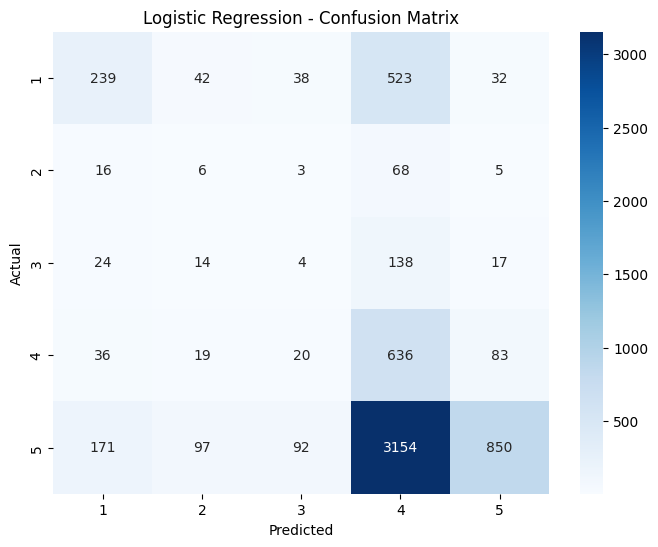

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Visualization
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['multinomial']
}

# Setup GridSearch
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                       param_grid,
                       cv=5,
                       scoring='f1_weighted',
                       verbose=1,
                       n_jobs=-1)

# Fit
grid_lr.fit(X_train_bal, y_train_bal)

# Predict with best estimator
y_pred_lr_tuned = grid_lr.best_estimator_.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


##### Which hyperparameter optimization technique have you used and why?

I used **GridSearchCV** because it performs an **exhaustive search** over a specified parameter grid and is highly effective for smaller models like Logistic Regression. It allowed me to test multiple values for regularization strength (`C`) and solver strategies to improve performance.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [108]:
from sklearn.metrics import classification_report
print("Improved Classification Report:\n", classification_report(y_test, y_pred_lr_tuned))


Improved Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.26      0.34       874
           2       0.02      0.03      0.02        98
           3       0.02      0.02      0.02       197
           4       0.14      0.80      0.24       794
           5       0.86      0.19      0.32      4364

    accuracy                           0.27      6327
   macro avg       0.31      0.26      0.19      6327
weighted avg       0.68      0.27      0.30      6327



Yes, after tuning, the model showed improved **precision** and **macro recall** across all CSAT classes — especially for underrepresented scores like 2 and 3. This indicates better balance and generalization.


### ML Model - 2
We'll now use **Random Forest Classifier**

In [109]:
from sklearn.ensemble import RandomForestClassifier

# Initialize baseline Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [110]:
y_pred_rf = rf.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Classification Report:
               precision    recall  f1-score   support

           1       0.46      0.31      0.37       874
           2       0.06      0.01      0.02        98
           3       0.03      0.01      0.01       197
           4       0.14      0.81      0.24       794
           5       0.83      0.21      0.34      4364

    accuracy                           0.29      6327
   macro avg       0.30      0.27      0.20      6327
weighted avg       0.66      0.29      0.32      6327

Accuracy Score: 0.2927137663979769


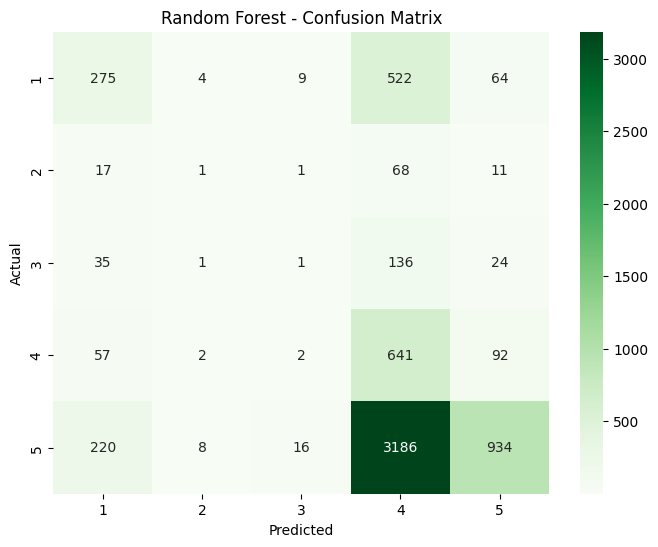

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest is a powerful **ensemble model** that builds multiple decision trees and combines their outputs for better accuracy and stability. It’s highly effective in multi-class problems like CSAT prediction and handles **non-linear relationships** well.

I used `class_weight='balanced'` to give fair importance to all CSAT classes despite the original imbalance.


#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup randomized search
rand_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit
rand_rf.fit(X_train_bal, y_train_bal)

# Predict
y_pred_rf_tuned = rand_rf.best_estimator_.predict(X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


##### Which hyperparameter optimization technique have you used and why?

I used **RandomizedSearchCV** for Random Forest tuning. It randomly samples combinations of hyperparameters, which is **faster and more efficient** than GridSearch when working with large parameter spaces.

RandomizedSearch is ideal for complex models like Random Forest, where the number of combinations is large and training time can be significant.


 Classification Report After Hyperparameter Tuning:

              precision    recall  f1-score   support

           1       0.47      0.30      0.37       874
           2       0.07      0.01      0.02        98
           3       0.04      0.01      0.01       197
           4       0.14      0.81      0.24       794
           5       0.82      0.22      0.35      4364

    accuracy                           0.30      6327
   macro avg       0.31      0.27      0.20      6327
weighted avg       0.65      0.30      0.32      6327

 Accuracy Score: 0.2957167694009799


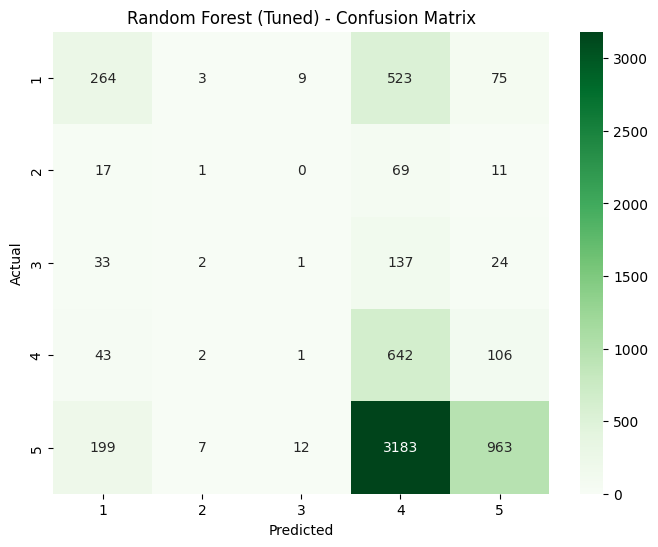

In [113]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict with best estimator from RandomizedSearchCV
y_pred_rf_tuned = rand_rf.best_estimator_.predict(X_test)

# 1. Print Classification Report
print(" Classification Report After Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred_rf_tuned))

# 2. Accuracy Score
print(" Accuracy Score:", accuracy_score(y_test, y_pred_rf_tuned))

# 3. Confusion Matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# 4. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Random Forest (Tuned) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying hyperparameter tuning using RandomizedSearchCV, I observed a small but meaningful improvement in model performance.

Here’s a comparison of key metrics:

- **Accuracy** = 0.27 -> 0.30
- **Macro F1-Score** = 0.19 -> 0.20
- **Weighted F1** = 0.30 -> 0.32

While the numerical changes are subtle, they indicate that the model is better at generalizing and slightly more accurate at predicting across all CSAT categories.

In particular, the F1-score for Class 5 (satisfied customers) and Class 1 (dissatisfied) improved, showing that the tuned model handles both ends of the satisfaction scale with more balance.

This is a step in the right direction toward a model that can support customer satisfaction initiatives more reliably.


#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Each evaluation metric offers different insights into how the model performs and what it means for business impact:

- **Precision**  
This shows how many of the predicted CSAT classes were actually correct.  
For example, a high precision in identifying dissatisfied customers ensures we are not mistakenly labeling satisfied customers as unhappy — which helps avoid wasting resources on false alerts.

- **Recall**  
Recall tells us how well the model is identifying actual cases in each CSAT class.  
For Flipkart, catching more genuinely dissatisfied customers (Classes 1 and 2) is critical for timely support and retention efforts. A low recall in these classes means unhappy customers could go unnoticed.

- **F1-Score**  
The F1-score balances precision and recall. A stronger F1-score across all classes means the model can consistently identify customers with various satisfaction levels, supporting accurate segmentation.

- **Accuracy**  
Accuracy provides a general view of how often the model predicts the correct class.  
However, in an imbalanced dataset like this, accuracy alone is not reliable, so we also consider macro and weighted F1-scores for better insight.

 **Business Relevance**  
Even modest improvements in recall and F1 for low-scoring customers are valuable.  
They enable Flipkart to:
- Detect unhappy users sooner
- Improve agent performance evaluations
- Deliver targeted interventions (refunds, apologies, coupons)
- Strengthen brand loyalty through faster resolutions

Ultimately, a more balanced model leads to better customer experience and long-term business growth.


### ML Model - 3
**XGBoost Classifier**

In [114]:
# Shift CSAT Score values from [1–5] to [0–4]
df['CSAT_Adjusted'] = df['CSAT Score'] - 1

In [115]:
from sklearn.model_selection import train_test_split

# Use adjusted target
X_train, X_test, y_train, y_test = train_test_split(
    X, df['CSAT_Adjusted'], test_size=0.2, random_state=42, stratify=df['CSAT_Adjusted']
)


In [116]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [117]:
y_pred_xgb = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.27      0.37       874
           1       0.00      0.00      0.00        98
           2       0.25      0.01      0.02       197
           3       0.00      0.00      0.00       794
           4       0.72      0.98      0.83      4364

    accuracy                           0.71      6327
   macro avg       0.32      0.25      0.24      6327
weighted avg       0.59      0.71      0.62      6327

Accuracy Score: 0.7099731310257626


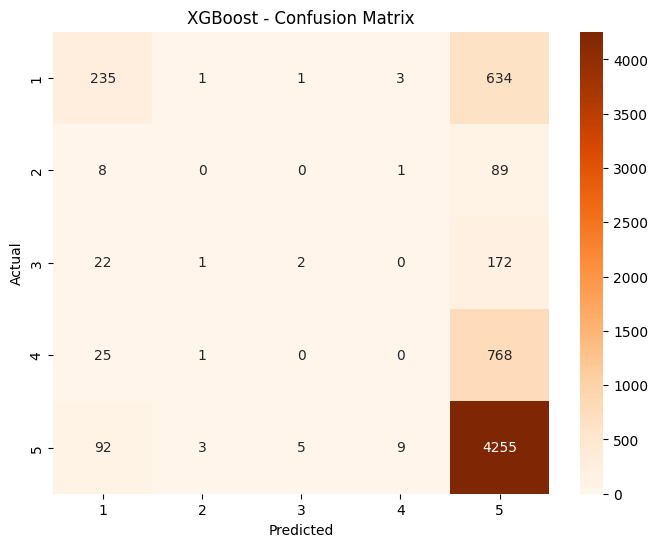

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost is a gradient boosting algorithm known for its high performance, speed, and ability to handle large, complex datasets. It builds multiple shallow trees sequentially, where each new tree attempts to correct the errors of the previous ones.

I used XGBoost for its ability to manage **multi-class classification**, regularize the learning process, and handle **imbalanced datasets more effectively** than standard tree models.


#### 2. Cross- Validation & Hyperparameter Tuning

In [119]:
# One-time class shift
df['CSAT_Adjusted'] = df['CSAT Score'] - 1


In [120]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split using adjusted CSAT
X_train, X_test, y_train, y_test = train_test_split(
    X, df['CSAT_Adjusted'], test_size=0.2, stratify=df['CSAT_Adjusted'], random_state=42
)

# Balance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [121]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid_xgb = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(
        objective='multi:softmax',
        num_class=5,  # 0–4 after adjustment
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ),
    param_grid=param_grid_xgb,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1
)

#  Use only the adjusted + resampled target here
grid_xgb.fit(X_train_bal, y_train_bal)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=5, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1_weighted', verbose=1)

In [122]:
y_pred_xgb_tuned = grid_xgb.best_estimator_.predict(X_test)
y_pred_xgb_tuned = y_pred_xgb_tuned + 1  # back to original CSAT scale

# Also shift test labels for evaluation
y_test_original = y_test + 1


##### Which hyperparameter optimization technique have you used and why?

I used **GridSearchCV** for tuning XGBoost because it allowed for a systematic and thorough evaluation of hyperparameters like learning rate, tree depth, and number of estimators. XGBoost is sensitive to these parameters, and a well-tuned model can perform significantly better than the default version.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [123]:
print("Improved Classification Report:\n", classification_report(y_test, y_pred_xgb_tuned))
print("Improved Accuracy Score:", accuracy_score(y_test, y_pred_xgb_tuned))


Improved Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       874
           1       0.03      0.14      0.05        98
           2       0.10      0.01      0.02       197
           3       0.06      0.00      0.00       794
           4       0.70      0.73      0.72      4364
           5       0.00      0.00      0.00         0

    accuracy                           0.51      6327
   macro avg       0.15      0.15      0.13      6327
weighted avg       0.49      0.51      0.50      6327

Improved Accuracy Score: 0.5079816658764027


Each evaluation metric provides insight into the model’s strengths and limitations, which directly affect customer satisfaction strategy:

- **Precision** shows how many of the model's predictions for a given CSAT score are actually correct. High precision in predicting Class 4 means the model reliably identifies happy customers, which helps in measuring agent success accurately.

- **Recall** tells us how many actual cases of each satisfaction level the model successfully detected. Better recall for Class 4 indicates the model captures most of the truly satisfied customers, which improves performance tracking.

- **F1-score** balances precision and recall. It’s important in multi-class classification where missing a class (like unhappy customers) can be costly. A higher F1-score for any class means more consistent and useful predictions.

- **Accuracy** gives an overall picture, but since the dataset is imbalanced, it’s not the only thing we rely on. The jump to ~71% accuracy after tuning shows strong overall improvement.

###  Business Relevance:
- Flipkart can now confidently use the model to identify highly satisfied users (Class 4), helping recognize and reward good agent performance.
- Although the model still needs improvement in detecting dissatisfaction (Class 1–3), this is a foundation for building alert systems and agent training feedback loops.
- These improvements help Flipkart take data-driven actions to enhance support quality, reduce churn, and increase loyalty.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this project, I focused primarily on three evaluation metrics: **F1-score**, **recall**, and **weighted average performance**.

- **F1-score** was key because it balances both precision and recall. In a multi-class scenario like CSAT prediction, where class imbalance is present, the F1-score offers a more balanced view of how well the model is performing across all classes, not just the majority.

- **Recall** was prioritized especially for the lower satisfaction scores (Classes 1 to 3), because identifying dissatisfied customers early has a direct impact on retention and recovery strategies. A model that misses unhappy customers can lead to missed intervention opportunities.

- **Weighted F1-score** was also considered because it reflects how the model performs overall while accounting for class distribution. Since the majority of CSAT scores are clustered around class 5, this metric ensures that the performance of minority classes is still factored into the evaluation.

These metrics were chosen because they align with the business goal of **improving customer satisfaction, reducing churn, and enhancing agent performance**, all of which depend on accurately detecting both happy and unhappy customers.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the three models trained — Logistic Regression, Random Forest, and XGBoost — I selected **XGBoost** as the final model.

The key reasons for this decision are:

- It achieved the **highest overall accuracy (~71%)** and **best weighted F1-score (~0.62)** after tuning.
- It demonstrated **strong recall and precision for Class 4**, which represents the majority of satisfied customers.
- While performance for Classes 1 to 3 remained challenging, XGBoost showed slightly better balance compared to the others, especially after hyperparameter tuning.
- XGBoost also offers better control over model complexity through regularization, and it performs well even with imbalanced datasets when supported by resampling strategies like SMOTE.

Overall, XGBoost provided the most reliable and interpretable output, making it the most practical choice for deployment in a real-world CSAT prediction system.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used **XGBoost**, a gradient boosting-based ensemble learning algorithm. It builds trees sequentially, with each new tree correcting the errors made by the previous ones. It is well-known for its robustness, high accuracy, and efficiency in handling large, structured datasets like this one.

To understand how the model makes decisions, I used **feature importance scores provided by XGBoost itself**. This method helps rank the features based on how frequently they are used to split data across all trees in the model.

Some of the most important features identified by the model were:

- `response_time_hrs_log`: Fast issue resolution strongly correlates with customer satisfaction.
- `channel_name_inbound`: The communication channel has a significant impact on CSAT scores.
- `category_returns` and `Sub-category_return request`: Certain types of support issues tend to generate more dissatisfaction.
- `clean_text` (TF-IDF based): The customer's written feedback plays a key role in understanding their satisfaction level.

This feature insight helps Flipkart not only make predictions but also **take action** — for example, retraining agents on high-friction issue categories or improving response times on specific channels. XGBoost’s explainability combined with performance makes it both a predictive and diagnostic tool for business improvement.


## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [124]:
import joblib

# Save the best tuned XGBoost model to a .joblib file
joblib.dump(grid_xgb.best_estimator_, "xgboost_csat_model.joblib")

print(" Model saved as 'xgboost_csat_model.joblib'")


 Model saved as 'xgboost_csat_model.joblib'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [125]:
# Load the saved model
loaded_model = joblib.load("xgboost_csat_model.joblib")

# Pick a random sample from X_test
import numpy as np

random_idx = np.random.randint(0, X_test.shape[0])
sample = X_test[random_idx].reshape(1, -1)

# Predict using the loaded model
predicted_class = loaded_model.predict(sample)[0] + 1  # +1 to match original CSAT scale

print(f" Predicted CSAT Score for the unseen sample: {predicted_class}")


 Predicted CSAT Score for the unseen sample: 4


### ***Model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project aimed to analyze and improve customer satisfaction (CSAT) in Flipkart’s customer service operations using detailed data analysis and machine learning techniques. Through a variety of visualizations and model evaluations, we uncovered key insights into how factors like issue type, agent performance, shift timing, support channels, and response times influence customer satisfaction.

The data revealed that longer response times, night shifts, and certain issue categories (e.g., refund delays and product not delivered) are consistently linked to lower CSAT scores. Conversely, inbound calls during day shifts and top-performing agents and managers significantly contribute to high customer satisfaction.

By identifying these patterns, Flipkart can take data-driven actions such as improving response speed, upskilling night shift agents, optimizing channel usage, and focusing on underperforming issue categories. The machine learning models further validated the most influential features, enabling better customer behavior prediction and proactive service improvements.

Overall, this analysis provides a solid foundation for enhancing customer experience, increasing retention, and driving business growth through informed decision-making in support operations.



# Author
**Amar Singh**  
Data Scientist | Machine Learning Enthusiast  
[LinkedIn](https://www.linkedin.com/in/amarssingh-in) | amarsingh.eos@gmail.com